## Model Results Comparison

Objectives:

    1. Establish clear concepts / methodology for assessment
    2. Assess Vendor Performance using definitions above
    3. Assess Model performance by using same metrics

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

In [4]:
# Test Dataset information
videos = glob('/datadrive/test_dataset/**')
VIDEOS_LIST = os.path.abspath('syria_videos.txt')
FRAME_LEVEL_SAVE_FOLDER = os.path.abspath('/datadrive/intermediate/frame_level')
VIDEO_LEVEL_SAVE_FOLDER = '/datadrive/intermediate/video_level'
VIDEO_SIGNATURES_SAVE_FOLDER = '/datadrive/intermediate/video_signatures'

In [5]:
len(videos)

3843

In [6]:
vendorquery_df = pd.read_excel('Benetech_Deduping Report_29Jan2019.xlsx',sheet_name='Queries')
not_searched_df = pd.read_excel('Benetech_Deduping Report_29Jan2019.xlsx',sheet_name='NotSearched')

In [7]:
not_searched_df.head()

,Q ID
0,s3.videocitestest/_IeeP6GgqAA-6d13b4ca9335abe1...
1,s3.videocitestest/001906ce8bcc45c081267ea4af88...
2,s3.videocitestest/02f48226db3d4b01a809c2e1b138...
3,s3.videocitestest/035cdab250914659981fb0060129...
4,s3.videocitestest/05d5df0e798a4b0caf8153e0f3e8...


In [8]:
vendorquery_df['filename'] = vendorquery_df['Q ID'].apply(lambda x:x.split('/')[-1])
not_searched_df['filename'] = vendorquery_df['Q ID'].apply(lambda x:x.split('/')[-1])
vendorquery_df.head()

,Q ID,filename
0,s3.videocitestest/_5g95MUIieM-7673d38ccc6e268b...,_5g95MUIieM-7673d38ccc6e268bf6d79e61f388d37b.mp4
1,s3.videocitestest/_a8srUndP8Y-48644a14cbb89129...,_a8srUndP8Y-48644a14cbb89129dccdcde0f5715de3.mp4
2,s3.videocitestest/_afTSrDroHs-06d2f1b68aabc513...,_afTSrDroHs-06d2f1b68aabc513424f74184663caa9.mp4
3,s3.videocitestest/_bja8VCDY_w-129f9c4b34cfe622...,_bja8VCDY_w-129f9c4b34cfe6227d4311231e08ee3f.mp4
4,s3.videocitestest/_cmXD8JT2hY-2b0c77a29384fe93...,_cmXD8JT2hY-2b0c77a29384fe9387b37408888ea96e.mp4


In [9]:
not_searched_fns = not_searched_df['filename']
vendorquery_df = vendorquery_df.loc[~vendorquery_df['filename'].isin(not_searched_fns),:]
vendorquery_df.shape

(2373, 2)

In [10]:
vendorquery_df['filename'].value_counts()

17178aac7c27400e944b71c25a170df6.webm                1
d33716bf0d0e4567995c5eaca8bdcef1.ogv                 1
nyia9UqpBnc-19fe4eab9ffa2ac395045a7320550fed.mp4     1
qHhQ1wEMF5w-6a8319d805945b40dd88e0c5d66c90eb.mp4     1
d125044aa0fe40d680c022b7f20243aa.mp4                 1
b79d1f79b8a74fbeb2d1c99dde71dd7f.mp4                 1
b428157a95cd4b5c9a2b58a8658fc3d9.webm                1
acac6a0c9b134b1ebedcf24145c421c3.webm                1
9ccd64b6ad62462dbe65e5033afb050d.mp4                 1
gHp4ZSiX0gw-857b20dd1be02eeb0493fa2280904323.webm    1
0GgISNbPmk8-656b3de1c0df3617469139e8ba73ff5a.mp4     1
18327cec79914b1f8e9dfab0398ddad7.ogv                 1
bFw4gUuZR3I-dc551d0d4141ea2ae2816c17b4da40cf.mp4     1
6f6efec4a188469390453c06f8421442.webm                1
1aa097c94e724a818e62d30701734674.webm                1
0e55b92adab049eb98241c5518ad75e7.mp4                 1
BIsmaOHlMR0-04a003e1a9bcc5d8435f284620473ec9.mp4     1
6b181fcbbb8a4314ab5276ea4121fb6c.mp4                 1
1892db9557

## Match Query summary

In [11]:
# Vendor Results spreadsheet
vendor_df = pd.read_excel('Benetech_Deduping Report_29Jan2019.xlsx')
# Additional filename fields for both Query / Match Videos
vendor_df['q_filename'] = vendor_df['Q ID'].apply(lambda x:x.split('/')[-1])
vendor_df['m_filename'] = vendor_df['M ID'].apply(lambda x:x.split('/')[-1])
# 
unique_qs = vendor_df['q_filename'].value_counts().index
vendor_df.loc[vendor_df['q_filename'] == unique_qs[0],:]

,Q ID,Q URL,Q Duration,Q Width,Q Height,Q FPS,M ID,M URL,M Duration,M Status,q_filename,m_filename
2,s3.videocitestest/QGFBGnpXMqE-07d9e6754f49d3eb...,https://videocitestest.s3.amazonaws.com/QGFBGn...,81,640,360,30.0,s3.videocitestest/6YmKwon4X0c-f518e04bd71707dd...,https://videocitestest.s3.amazonaws.com/6YmKwo...,179,match,QGFBGnpXMqE-07d9e6754f49d3eb87d95767bff7e696.mp4,6YmKwon4X0c-f518e04bd71707ddd985f89f03cc7784.mp4
129,s3.videocitestest/QGFBGnpXMqE-07d9e6754f49d3eb...,https://videocitestest.s3.amazonaws.com/QGFBGn...,81,640,360,30.0,s3.videocitestest/sW02MYKmUaM-f8c6ef6974e0d853...,https://videocitestest.s3.amazonaws.com/sW02MY...,64,match,QGFBGnpXMqE-07d9e6754f49d3eb87d95767bff7e696.mp4,sW02MYKmUaM-f8c6ef6974e0d853df113f45e1242628.mp4
138,s3.videocitestest/QGFBGnpXMqE-07d9e6754f49d3eb...,https://videocitestest.s3.amazonaws.com/QGFBGn...,81,640,360,30.0,s3.videocitestest/018MsV21q00-3419176ec77eea4d...,https://videocitestest.s3.amazonaws.com/018MsV...,81,match,QGFBGnpXMqE-07d9e6754f49d3eb87d95767bff7e696.mp4,018MsV21q00-3419176ec77eea4da5161cf6faa05a3d.mp4
311,s3.videocitestest/QGFBGnpXMqE-07d9e6754f49d3eb...,https://videocitestest.s3.amazonaws.com/QGFBGn...,81,640,360,30.0,s3.videocitestest/4fbf84566d434628bc6954a36e77...,https://videocitestest.s3.amazonaws.com/4fbf84...,79,match,QGFBGnpXMqE-07d9e6754f49d3eb87d95767bff7e696.mp4,4fbf84566d434628bc6954a36e7722d5.webm
325,s3.videocitestest/QGFBGnpXMqE-07d9e6754f49d3eb...,https://videocitestest.s3.amazonaws.com/QGFBGn...,81,640,360,30.0,s3.videocitestest/7faf034173f4451398b05e6f1686...,https://videocitestest.s3.amazonaws.com/7faf03...,83,match,QGFBGnpXMqE-07d9e6754f49d3eb87d95767bff7e696.mp4,7faf034173f4451398b05e6f1686a896.webm
338,s3.videocitestest/QGFBGnpXMqE-07d9e6754f49d3eb...,https://videocitestest.s3.amazonaws.com/QGFBGn...,81,640,360,30.0,s3.videocitestest/4214d032b0924870a216958e84a7...,https://videocitestest.s3.amazonaws.com/4214d0...,86,match,QGFBGnpXMqE-07d9e6754f49d3eb87d95767bff7e696.mp4,4214d032b0924870a216958e84a7544a.ogv


In [12]:
vendor_df.shape

(555, 12)

In [13]:
vendor_df['q_filename'].value_counts()[:20]

QGFBGnpXMqE-07d9e6754f49d3eb87d95767bff7e696.mp4    6
550c6ee08ac64e31849862c60b810cb9.ogv                5
b55219c130a64df49a05c61b825efdc7.ogv                4
3b95a145dde44ea7a947a8897d0291b8.mp4                4
4ac1ad9c38934eaab7fa0146141c9354.mp4                4
8885400fcf264e67babb46fbe1b8d290.mp4                4
4pcIA0Vx_Ok-a6ff21a834134a75701b950030cca07c.mp4    4
9b223626726c4e8db8d9fe683cb64c20.webm               4
a11fa902d2df4e7fb623d8f15dbbc907.webm               4
80a0a23aeb1d4a699f5cdcf846eee96c.ogv                4
GyaFEZujpbY-e2e5d448e968fd988bf891592ef744af.mp4    3
fdbecbfceb4a49cc940a816aff85f183.mp4                3
ba2dac8a2a4b44659c53671358b6980a.ogv                3
743d8aef543e49f0901853f8ec239978.webm               3
Au6wyThNMGk-e4e7961b8eb424ab6cb4bedb7914abc9.mp4    3
50b360289d6849eba54758c4021d70fa.mp4                3
04da0835050b472689abff6fbb47515c.ogv                3
d037ae1a2c8a43938139252e660dec04.webm               3
9207ef23b1aa42d2ad4e138b7a5f

Assumption: Each query on the Queries sheet, was performed against the remaining dataset. This explains the reason why there are multiple queries for a given filename.

In [14]:
augmentation_manifesto = pd.read_csv('/home/felipeb/augmenter/augmented_dataset_manifest')

In [15]:
augmentation_manifesto['original_basename'] = augmentation_manifesto['file_path'].apply(lambda x:os.path.basename(x))
test_dataset = [os.path.basename(x) for x in videos]
used = augmentation_manifesto.loc[augmentation_manifesto['new_filename'].isin(test_dataset),:]
used['isAugmented'] = True

/home/felipeb/.conda/envs/winnow/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
augmented_files = used['new_filename'].values

In [17]:
vendor_df['augmented_q'] = False
vendor_df['augmented_m'] = False

vendor_df.loc[vendor_df['q_filename'].isin(augmented_files),'augmented_q'] = True
vendor_df.loc[vendor_df['m_filename'].isin(augmented_files),'augmented_m'] = True

In order to assess performance, we'll we'll restrain the problem to the files that we actually have the answer (augmented files). Even though there might be additional files for which the vendor has reported the right answer but the only way to verify it is to perform manual validation.

In [18]:
vendorquery_df.head()

,Q ID,filename
127,s3.videocitestest/0e30b5853e21433192877c1a76e9...,0e30b5853e21433192877c1a76e9f203.mp4
128,s3.videocitestest/0e55b92adab049eb98241c5518ad...,0e55b92adab049eb98241c5518ad75e7.mp4
129,s3.videocitestest/0e57cd65cae44889ba079ef92c00...,0e57cd65cae44889ba079ef92c00fdfd.mp4
130,s3.videocitestest/0eb0bcf51eee4ae58a5bc10a2faf...,0eb0bcf51eee4ae58a5bc10a2faf0c8c.ogv
131,s3.videocitestest/0eb3de748a614cbd8555ab39178d...,0eb3de748a614cbd8555ab39178dd842.ogv


In [19]:
m_q = dict(zip(vendor_df['m_filename'],vendor_df['q_filename']))

In [20]:
def matching(x,d):
    try:
        return d[x]
    except:
        return x

In [21]:
vendorquery_df['match_filename'] = vendorquery_df['filename'].apply(lambda x:matching(x,m_q))

In [22]:
vendorquery_df['match_filename'].nunique()

2172

In [23]:
vendorquery_df['isUnique'] = vendorquery_df.apply(lambda x: x['filename'] == x['match_filename'],axis=1)

In [24]:
vendorquery_df.isUnique.value_counts()

True     1954
False     419
Name: isUnique, dtype: int64

Unless there are two files from the same source, or the source itself, we cannot make any assumptions about a file being unique. Now we need to implement a few helper functions to evaluate the results in a way to account for these details.

In [25]:
augmentation_manifesto.head()

,Unnamed: 0,banner,bitrate,color_intensity,crop,extension,file_path,intensity,logo,offset,shaky,shaky_after_logo,speed_change,filename,original_extension,new_filename,original_basename
0,0,NaN,32k,0.42,NaN,NaN,/datadrive/videos/BVx0nR366sk-3b0933b1902d9a66...,-0.09,NaN,NaN,False,True,-0.09,BVx0nR366sk-3b0933b1902d9a66730d447258c425ec,webm,16560611413745a1b33748cad5cdb726.webm,BVx0nR366sk-3b0933b1902d9a66730d447258c425ec.webm
1,1,NaN,64k,0.24,NaN,NaN,/datadrive/videos/6Y1uTg7wCV8-b068dba553b7529e...,-0.05,logos/jazeera.png,6.0,False,True,NaN,6Y1uTg7wCV8-b068dba553b7529eb2c2c4727c47fed9,webm,4fe31156621142de9be93e3c6a4a8bd9.webm,6Y1uTg7wCV8-b068dba553b7529eb2c2c4727c47fed9.webm
2,2,False,NaN,NaN,NaN,NaN,/datadrive/videos/VuW-M9TB7tM-73472a9187f950d4...,-0.12,logos/fox.png,2.0,False,False,NaN,VuW-M9TB7tM-73472a9187f950d4812582d25154f1d4,mp4,49f397b693eb41a9b7c8a95b0147c6a0.mp4,VuW-M9TB7tM-73472a9187f950d4812582d25154f1d4.mp4
3,3,NaN,NaN,NaN,[0.11 0.15],NaN,/datadrive/videos/gMz2bJykKaY-31b60bdf2a061902...,NaN,NaN,3.0,False,True,0.34,gMz2bJykKaY-31b60bdf2a061902a1c004eab2ced596,webm,e366f4367c2148c3bb4e88a6bf3b0835.webm,gMz2bJykKaY-31b60bdf2a061902a1c004eab2ced596.webm
4,4,NaN,NaN,NaN,[0.04 0.03],NaN,/datadrive/videos/6QWIAsPOlxM-907ba6ac2932e487...,-0.19,logos/sbt.gif,3.0,False,False,0.31,6QWIAsPOlxM-907ba6ac2932e487c215c9b364d06e14,webm,7611fe4baab94392a82f5a8a28bdeba2.webm,6QWIAsPOlxM-907ba6ac2932e487c215c9b364d06e14.webm


In [26]:
# Match Augmented to their counterparts
a_o = dict(zip(augmentation_manifesto['new_filename'],augmentation_manifesto['original_basename']))
vendorquery_df['original_basename_q'] = vendorquery_df['filename'].apply(lambda x:matching(x,a_o))
vendorquery_df['original_basename_m'] = vendorquery_df['match_filename'].apply(lambda x:matching(x,a_o))

In [27]:
per_a = vendorquery_df['original_basename_q'].value_counts()
msk = per_a[per_a > 1].index.values

In [28]:
restricted_vendor = vendorquery_df.loc[vendorquery_df['original_basename_q'].isin(msk),:]
# restricted = restricted.loc[restricted.isUnique == False,:]
restricted_vendor.shape

(1466, 6)

In [29]:
sum(restricted_vendor['original_basename_m'] == restricted_vendor['original_basename_q']) / restricted_vendor.shape[0]

0.9311050477489768

In [30]:
restricted_vendor.to_csv('vendor_results_2.csv')

In [31]:
sum(vendorquery_df['original_basename_m'] == vendorquery_df['original_basename_q'])

2211

In [32]:
vendorquery_df.to_csv('full_vendor_results.csv')

## Analysing Results from our model

In [33]:
from winnow.feature_extraction import SimilarityModel


sm = SimilarityModel()

video_signatures = sm.predict(VIDEO_LEVEL_SAVE_FOLDER)
# Save Signatires
video_signatures.shape

(3843, 4096)


(3843, 500)

In [34]:
video_signatures = np.nan_to_num(video_signatures)

In [35]:
filenames = [x.split('_vgg')[0].split('/')[-1] for x in  sm.index]

In [36]:
in_q = vendorquery_df['filename'].apply(lambda x:x.split('.')[0])

In [37]:
video_space = video_signatures[np.isin(filenames,in_q)]
labels = np.array(filenames)[np.isin(filenames,in_q)]

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
distances = np.linspace(0.0001,0.3)
results = []
for d in distances:
    
    clusters = DBSCAN(metric='cosine',eps=d,min_samples=1).fit_predict(video_space)
    model_results = pd.DataFrame({'filename':labels,'cluster':clusters})
    filename_original = a_o = dict(zip(augmentation_manifesto['new_filename'].apply(lambda x:x.split('.')[0]),augmentation_manifesto['original_basename']))
    filename_original = a_o = dict(zip(augmentation_manifesto['new_filename'].apply(lambda x:x.split('.')[0]),augmentation_manifesto['original_basename']))
    model_results['original_basename_q'] = model_results['filename'].apply(lambda x:matching(x,filename_original))
    model_results['original_basename_q'] = model_results['original_basename_q'].apply(lambda x:x.split('.')[0])
    model_results ['original_basename_m'] = 'NA'
    for c in model_results.cluster.unique():

        msk = model_results.cluster == c
        prevailing = model_results.loc[msk,:].original_basename_q.value_counts().index.values[0]
        model_results.loc[msk,'original_basename_m'] = prevailing


    per_a = model_results['original_basename_q'].value_counts()
    msk = per_a[per_a > 1].index.values
    restricted = model_results.loc[model_results['original_basename_q'].isin(msk),:]   
    result = sum(restricted['original_basename_m'] == restricted['original_basename_q']) / restricted.shape[0]   
    results.append(result)
    
print(results)
    

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9993178717598908, 0.9979536152796725, 0.9972714870395635, 0.9965893587994543, 0.995225102319236, 0.9945429740791268, 0.9945429740791268, 0.9945429740791268, 0.9938608458390177, 0.9918144611186903, 0.9890859481582538, 0.9884038199181446, 0.9884038199181446, 0.9863574351978172, 0.9822646657571623, 0.9795361527967258, 0.9774897680763983, 0.9720327421555253, 0.9686221009549796, 0.9638472032742156, 0.956343792633015, 0.9454297407912687, 0.9297407912687585, 0.9106412005457026, 0.902455661664393, 0.8888130968622101, 0.8697135061391542, 0.8533424283765347, 0.8369713506139154, 0.8185538881309686, 0.8028649386084584, 0.7803547066848567, 0.7564802182810368, 0.7285129604365621, 0.7025920873124147, 0.6691678035470668, 0.6439290586630286, 0.6091405184174625, 0.582537517053206, 0.5491132332878581, 0.5211459754433834]


In [40]:
np.argmax(results)

0

In [41]:
distances = np.linspace(0.0001,0.5)
results = []
for d in distances:
    
    clusters = DBSCAN(metric='cosine',eps=d,min_samples=1).fit_predict(video_space)
    model_results = pd.DataFrame({'filename':labels,'cluster':clusters})
    filename_original = a_o = dict(zip(augmentation_manifesto['new_filename'].apply(lambda x:x.split('.')[0]),augmentation_manifesto['original_basename']))
    filename_original = a_o = dict(zip(augmentation_manifesto['new_filename'].apply(lambda x:x.split('.')[0]),augmentation_manifesto['original_basename']))
    model_results['original_basename_q'] = model_results['filename'].apply(lambda x:matching(x,filename_original))
    model_results['original_basename_q'] = model_results['original_basename_q'].apply(lambda x:x.split('.')[0])
    model_results ['original_basename_m'] = 'NA'
    for c in model_results.cluster.unique():

        msk = model_results.cluster == c
        prevailing = model_results.loc[msk,:].original_basename_q.value_counts().index.values[0]
        top = model_results.loc[msk,:].original_basename_q.value_counts().values[0]
        if top != 1:
            model_results.loc[msk,'original_basename_m'] = prevailing
        else:
            model_results.loc[msk,'original_basename_m'] = 'na'
            

    per_a = model_results['original_basename_q'].value_counts()
    msk = per_a[per_a > 1].index.values
    restricted = model_results.loc[model_results['original_basename_q'].isin(msk),:]   
    result = sum(restricted['original_basename_m'] == restricted['original_basename_q']) / restricted.shape[0]   
    results.append(result)
    
print(results)

KeyboardInterrupt: 

In [ ]:
max(results)

In [ ]:
distances[np.argmax(results)]

## Official Inference

In [42]:
clusters = DBSCAN(metric='cosine',eps=0.2,min_samples=1).fit_predict(video_space)
model_results = pd.DataFrame({'filename':labels,'cluster':clusters})
filename_original = a_o = dict(zip(augmentation_manifesto['new_filename'].apply(lambda x:x.split('.')[0]),augmentation_manifesto['original_basename']))
filename_original = a_o = dict(zip(augmentation_manifesto['new_filename'].apply(lambda x:x.split('.')[0]),augmentation_manifesto['original_basename']))
model_results['original_basename_q'] = model_results['filename'].apply(lambda x:matching(x,filename_original))
model_results['original_basename_q'] = model_results['original_basename_q'].apply(lambda x:x.split('.')[0])
model_results ['original_basename_m'] = 'NA'
for c in model_results.cluster.unique():

    msk = model_results.cluster == c
    prevailing = model_results.loc[msk,:].original_basename_q.value_counts().index.values[0]
    model_results.loc[msk,'original_basename_m'] = prevailing


per_a = model_results['original_basename_q'].value_counts()
msk = per_a[per_a > 1].index.values
restricted = model_results.loc[model_results['original_basename_q'].isin(msk),:]   
result = sum(restricted['original_basename_m'] == restricted['original_basename_q']) / restricted.shape[0]   
results.append(result)
    

In [43]:
sum(model_results['original_basename_m'] == model_results['original_basename_q'])

2169

In [44]:
model_results['filename'].nunique()

2373

In [45]:
model_results['isUnique'] = model_results['filename'] == model_results['original_basename_q']

In [46]:
model_results.isUnique.value_counts()

False    1451
True      922
Name: isUnique, dtype: int64

In [47]:
per_a = model_results['original_basename_q'].value_counts()
msk = per_a[per_a > 1].index.values

restricted = model_results.loc[model_results['original_basename_q'].isin(msk),:]

In [48]:
restricted.shape

(1466, 5)

In [49]:
sum(restricted['original_basename_m'] == restricted['original_basename_q']) / restricted.shape[0]

0.9085948158253752

In [50]:
restricted.to_csv('model_results.csv')

In [51]:
model_results.to_csv('full_model_results.csv')

In [52]:
model_results.cluster.nunique()

1888

In [57]:
model_results.shape

(2373, 5)

In [58]:
len(labels)

2373

In [59]:
model_results.head()

,filename,cluster,original_basename_q,original_basename_m,isUnique
0,7d88847165794ae6a90e6336571da918,0,Wa5_fQVlU1w-482f5996d46f7ce369ee9222ee6821fb,Wa5_fQVlU1w-482f5996d46f7ce369ee9222ee6821fb,False
1,oCQgqyQaFj4-fbeaafdb4054a30e4bc9ae66713f445c,1,oCQgqyQaFj4-fbeaafdb4054a30e4bc9ae66713f445c,oCQgqyQaFj4-fbeaafdb4054a30e4bc9ae66713f445c,True
2,b37a3303c8834fd99833e95746088ca3,2,G9LRUrGmUvA-211e0156bbd6a97e70e21e54bf64bff2,G9LRUrGmUvA-211e0156bbd6a97e70e21e54bf64bff2,False
3,S21kK7M8wz0-4a910daa08b9eac3aeef6019e2eb22f5,3,S21kK7M8wz0-4a910daa08b9eac3aeef6019e2eb22f5,S21kK7M8wz0-4a910daa08b9eac3aeef6019e2eb22f5,True
4,iarTmYN_cFw-cbec9d312f1eda1d3305c0f48de927ad,4,iarTmYN_cFw-cbec9d312f1eda1d3305c0f48de927ad,iarTmYN_cFw-cbec9d312f1eda1d3305c0f48de927ad,True


In [61]:
total_matches = model_results['original_basename_q'].value_counts()

In [62]:
total_maches = total_matches[total_matches > 1]

In [65]:
sum(total_matches) - len(total_matches)

836

In [68]:
model_results.filename.nunique() - model_results['original_basename_q'].nunique()

836

1537

## Query Based

In [53]:
from sklearn.neighbors import NearestNeighbors,KDTree,BallTree,LSHForest,NearestCentroid
from pyvis.network import Network

In [54]:
def filter_results(distances,indexes,thr):
    results = []
    results_distances = []
    msk = distances < thr
    for i,r in enumerate(msk):
        results.append(indexes[i,r])
        results_distances.append(distances[i,r])
    return results,results_distances



def evaluate_match_based(estimator,plot=True):
    
    estimator.fit(video_space)
    distances,indexes = estimator.kneighbors(video_space,n_neighbors=20)
    if plot == True:
        plt.hist(distances[:,1::].ravel())
        
    threshold = 0.01
    
    msk = distances < threshold
    
    results,results_distances = filter_results(distances,indexes,0.4)
    
    net = Network(notebook=True,height='1000px',width='1000px')
    net.barnes_hut()

    for i,l in enumerate(labels):
        net.add_node(str(i),label=str(l))

    for i,d in enumerate(results):
        for j,m in enumerate(d):
            if j != 0:
                net.add_edge(str(i),str(m),weight=str(results_distances[i][j]))

    net.show_buttons(filter_=['physics'])
    net.show('mygraph.html')
    return net
    
    
    
    
    
    
    

In [ ]:
n = evaluate_match_based(LSHForest(n_estimators=20))

In [ ]:
n.show('t.html')

In [ ]:
%debug

In [ ]:
lsh = LSHForest(n_estimators=20).fit(video_space)

In [ ]:
results_sorteddistances,indexes = lsh.kneighbors(video_space,n_neighbors=30)

In [ ]:
indexes

KD Tree

In [ ]:
np.max(distances)

In [ ]:
distances.shape

In [ ]:
distances

In [ ]:
plt.hist(distances[:,1::].ravel())

In [ ]:
threshold = 0.5
msk = distances < threshold

In [ ]:
msk.shape

In [ ]:
indices.shape

In [ ]:
msk

In [ ]:
indices

In [55]:
def filter_results(thr):
    results = []
    results_distances = []
    msk = distances < thr
    for i,r in enumerate(msk):
        results.append(indices[i,r])
        results_distances.append(distances[i,r])
    return results,results_distances

In [ ]:
from collections import Counter

In [ ]:
inner_sorted = [sorted(x) for x in results]
results_assessment = sorted(inner_sorted,key=lambda x:len(x),reverse=True)

Network Analysis

In [75]:
nm = []
ttt = []
for tt in np.linspace(0.3,0.8):
    nn = NearestNeighbors(n_neighbors=50,metric='euclidean',algorithm='kd_tree')
    nn.fit(video_space)
    distances,indices = nn.kneighbors(video_space)
    results,results_distances = filter_results(tt)

    ss = sorted(zip(results,results_distances),key=lambda x:len(x[0]),reverse=True)
    results_sorted = [x[0] for x in ss]
    results_sorted_distance = [x[1] for x in ss]


    q = []
    m = []
    distance = []


    for i,r in enumerate(results_sorted):
        for j,matches in enumerate(r):
            if j == 0:
                qq = matches
            q.append(qq)
            m.append(matches)
            distance.append(results_sorted_distance[i][j])

    match_df = pd.DataFrame({"query":q,"match":m,"distance":distance})            
    match_df['query_video'] = labels[match_df['query']]
    match_df['match_video'] = labels[match_df['match']]

    match_df['original_basename_q'] = match_df['query_video'].apply(lambda x:matching(x,filename_original))
    match_df['original_basename_q'] = match_df['original_basename_q'].apply(lambda x:x.split('.')[0])
    match_df['original_basename_m'] = match_df['match_video'].apply(lambda x:matching(x,filename_original))
    match_df['original_basename_m'] = match_df['original_basename_m'].apply(lambda x:x.split('.')[0])

    match_df['label'] = match_df['original_basename_q'] ==  match_df['original_basename_m'] 
    
    print(tt)
    print(match_df.loc[match_df.distance > 0.0,:].label.value_counts())
    nm.append(match_df.loc[match_df.distance > 0.0,:].label.value_counts())
    ttt.append(tt)
    
    match_df.to_csv('matches_at_{}_distance.csv'.format(tt))


0.3
True     104
False      2
Name: label, dtype: int64
0.31020408163265306
True     114
False      2
Name: label, dtype: int64
0.32040816326530613
True     124
False      2
Name: label, dtype: int64
0.33061224489795915
True     140
False      4
Name: label, dtype: int64
0.3408163265306122
True     146
False      6
Name: label, dtype: int64
0.3510204081632653
True     164
False      8
Name: label, dtype: int64
0.36122448979591837
True     176
False      8
Name: label, dtype: int64
0.37142857142857144
True     192
False     10
Name: label, dtype: int64
0.38163265306122446
True     198
False     12
Name: label, dtype: int64
0.39183673469387753
True     212
False     14
Name: label, dtype: int64
0.4020408163265306
True     226
False     16
Name: label, dtype: int64
0.4122448979591836
True     242
False     22
Name: label, dtype: int64
0.4224489795918367
True     258
False     24
Name: label, dtype: int64
0.43265306122448977
True     268
False     28
Name: label, dtype: int64
0.44285714285

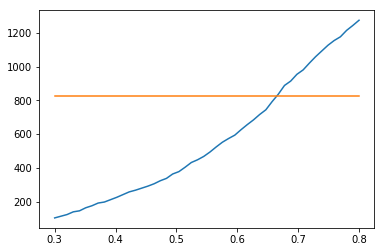

In [82]:
plt.plot(ttt,[x[True] for x in nm])
plt.plot(ttt,[826] * len(ttt))

In [90]:
sorted(zip(ttt,nm),key = lambda x:(x[1][True] - 826)**2,reverse=False)

[(0.6673469387755102, False    1376
  True      836
  Name: label, dtype: int64), (0.657142857142857, False    1130
  True      792
  Name: label, dtype: int64), (0.6775510204081632, False    1636
  True      888
  Name: label, dtype: int64), (0.6469387755102041, False    942
  True     744
  Name: label, dtype: int64), (0.6877551020408164, False    1954
  True      914
  Name: label, dtype: int64), (0.636734693877551, False    768
  True     716
  Name: label, dtype: int64), (0.6979591836734693, False    2368
  True      954
  Name: label, dtype: int64), (0.6265306122448979, True     684
  False    650
  Name: label, dtype: int64), (0.7081632653061224, False    2848
  True      980
  Name: label, dtype: int64), (0.6163265306122448, True     656
  False    534
  Name: label, dtype: int64), (0.7183673469387755, False    3502
  True     1020
  Name: label, dtype: int64), (0.6061224489795918, True     626
  False    428
  Name: label, dtype: int64), (0.5959183673469388, True     594
  Fal

In [ ]:
match_df.to_csv('matches_at_4distance.csv')

In [ ]:
results[0]

In [ ]:
len(results_sorted)

In [ ]:
print(len(q),len(m),len(distance))

In [ ]:
match_df.head()

In [ ]:
match_df.head()

In [ ]:
match_df.label.value_counts()

In [ ]:
import networkx as nx

In [ ]:
net = nx.Graph()

for i,l in enumerate(labels):
    net.add_node(i,label=l)
    
for i,d in enumerate(results):
    for j,m in enumerate(d):
        if j != 0:
            net.add_edge(i,m,weight=results_distances[i][j])

In [ ]:
nx.subgraph(net,list(net.nodes()))

In [ ]:
results = [list(x) for x in list(nx.connected_components(net)) if len(x) >1 ]

In [ ]:
results = sorted(results, key=lambda x:len(x),reverse=True)

In [ ]:
test_i = np.where(labels == 'wTFMF4CeMDA-74a2f0094e4ea9ccded15ccbe0dba9ce')[0][0]
print(distances[test_i])
print(indices[test_i])
print(labels[indices[test_i]])

## Validation

In [ ]:
labels

In [ ]:
results[2]

In [ ]:
candidates = []
for i,r in enumerate(results):

    val = list(labels[results[i]])
    augmentation_manifesto['new_filename_ne'] = augmentation_manifesto['new_filename'].apply(lambda x:x.split('.')[0])
    msk1 = augmentation_manifesto['orig'].isin(val)
    msk2 = augmentation_manifesto['new_filename_ne'].isin(val)
    msk3 = msk1 | msk2
    t = augmentation_manifesto.loc[msk3 ,:].sort_values(by='new_filename')
    if t.filename.value_counts().values[0] != t.shape[0]:
        candidates.append(t)
        print(i,t.filename.value_counts())
        

In [ ]:
t.filename.value_counts()

In [ ]:
t = candidates[2]

In [ ]:
t.filename.value_counts()

In [ ]:
t

In [ ]:
videos = t.file_path.values

In [ ]:
t

In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open(videos[0], 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [ ]:
video = io.open(videos[4], 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [ ]:
results,results_distances = filter_results(0.7)

In [ ]:
from pyvis.network import Network

In [ ]:
print(len(labels),len(results),len(results_distances))

In [ ]:
for i,l in enumerate(labels):
    net.add_node(str(i),label=l)

In [ ]:
for i,d in enumerate(results):
    for j,m in enumerate(d):
        if j != 0:
            net.add_edge(str(i),str(m),weight=results_distances[i][j])

In [ ]:
net.show_buttons(filter_=['physics'])

In [ ]:
net.show('mygraph.html')

In [ ]:
import networkx as nx

In [ ]:
model_results.iloc[results_assessment[54],:]

In [ ]:
model_results.cluster.nunique()

In [ ]:
model_results.loc[model_results['original_basename_m'] == '7LYTx0IJtPY-983ff03d543f14a7fdf9f8e84e55f6b6',:]

In [ ]:
distances[504]

In [ ]:
distances[665]

In [ ]:
augmentation_manifesto['orig'] = augmentation_manifesto['original_basename'].apply(lambda x:x.split('.')[0])

In [ ]:
augmentation_manifesto.loc[augmentation_manifesto['orig'] == '7LYTx0IJtPY-983ff03d543f14a7fdf9f8e84e55f6b6',:]

In [ ]:
augmentation_manifesto.fillna(0).mean()

In [ ]:
augmentation_manifesto.loc[augmentation_manifesto['orig'] == '7LYTx0IJtPY-983ff03d543f14a7fdf9f8e84e55f6b6',:].fillna(0).mean()

In [ ]:
model_results['original_basename_m'].value_counts()

In [ ]:
rr = model_results.groupby(by='original_basename_q')['cluster'].agg(['count','nunique'])

In [ ]:
model_results.head()

In [ ]:
rr.sort_values(by='count',ascending=False)

In [ ]:
rr.columns

In [ ]:
def evaluate(x):
    if x['count'] == x['nunique']:
        rr['purity'] = 0
    else:
        return (x['count'] / x['nunique'])  / x['count']
        
    
    

In [ ]:
rr['purity'] =  rr.apply(evaluate,axis=1).fillna(0)

In [ ]:
rr.sort_values(by='purity',ascending=False)

In [ ]:
rr.loc[rr['purity'] > 0.3,:]['purity'].shape

In [ ]:
rr.shape

In [ ]:
rr.loc[rr['count'] > 1,:].shape

In [ ]:
rr['a'] = rr['purity'] * rr['count']

In [ ]:
sum(rr['a']) / rr.shape[0]